63011212019 อาทิตย์ ทวีบท รหัสวิชา 1204317 Sec 1 (06/07/2565)

Exploring Categorical Features

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


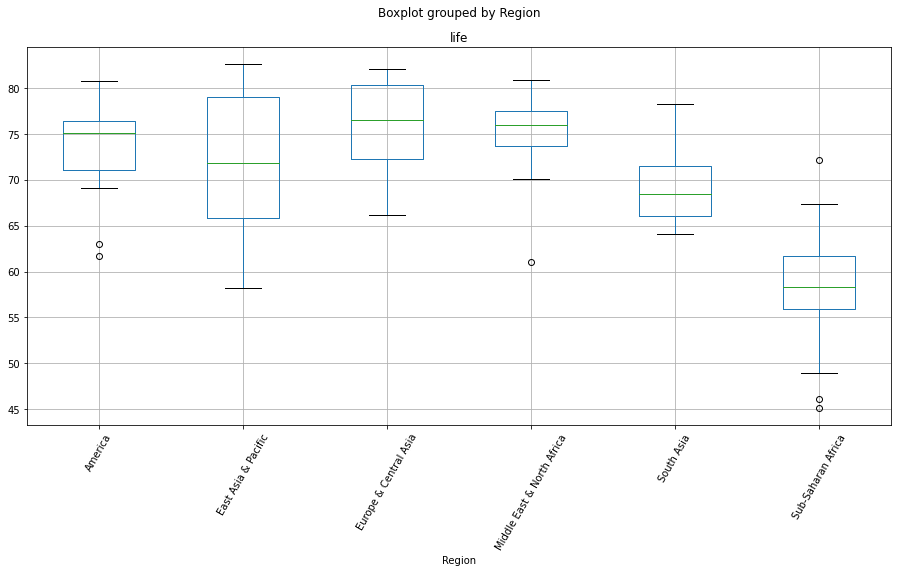

In [ ]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7)) #ความสูง ความกว้าง
# อ่าน 'gapminder.csv' ลงใน DataFrame: df
df = pd.read_csv('/content/drive/MyDrive/DS/dataweek1/gm_2008_region.csv')
# แสดงคอลัมน์ df
print(df.columns)
# สร้าง boxplot เพื่อ grouped by region
df.boxplot('life', 'Region', rot = 60, ax = ax) #
# แสดง plot
plt.show()

Dummy Variables

In [ ]:
# แสดง columns ของ df_region
print("Dataframe with Region:\n ",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB
Dataframe with Region:
  None


In [ ]:
print("Dataframe head containing Region column :\n", df['Region'].head(10))

Dataframe head containing Region column :
 0    Middle East & North Africa
1            Sub-Saharan Africa
2                       America
3         Europe & Central Asia
4           East Asia & Pacific
5         Europe & Central Asia
6         Europe & Central Asia
7                       America
8                    South Asia
9                       America
Name: Region, dtype: object


In [ ]:
# Create dummy variables : df_region
df_region1 = pd.get_dummies(df)
print("Dataframe after creating dummy columns without dropping region :\n ",df_region1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   population                         139 non-null    float64
 1   fertility                          139 non-null    float64
 2   HIV                                139 non-null    float64
 3   CO2                                139 non-null    float64
 4   BMI_male                           139 non-null    float64
 5   GDP                                139 non-null    float64
 6   BMI_female                         139 non-null    float64
 7   life                               139 non-null    float64
 8   child_mortality                    139 non-null    float64
 9   Region_America                     139 non-null    uint8  
 10  Region_East Asia & Pacific         139 non-null    uint8  
 11  Region_Europe & Central Asia       139 non-null    uint8  

In [ ]:
# Create dummy variables with drop_first=True: df_region
df_region2 = pd.get_dummies(df,drop_first=True)
# Print the new columns of df_region
print("Dataframe Region with Dummy Columns but dropping first dummy column : \n",df_region2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   population                         139 non-null    float64
 1   fertility                          139 non-null    float64
 2   HIV                                139 non-null    float64
 3   CO2                                139 non-null    float64
 4   BMI_male                           139 non-null    float64
 5   GDP                                139 non-null    float64
 6   BMI_female                         139 non-null    float64
 7   life                               139 non-null    float64
 8   child_mortality                    139 non-null    float64
 9   Region_East Asia & Pacific         139 non-null    uint8  
 10  Region_Europe & Central Asia       139 non-null    uint8  
 11  Region_Middle East & North Africa  139 non-null    uint8  

In [ ]:
print("Dataframe Region columns after dummification step :\n ", df_region2.iloc[:10,9:11])

Dataframe Region columns after dummification step :
     Region_East Asia & Pacific  Region_Europe & Central Asia
0                           0                             0
1                           0                             0
2                           0                             0
3                           0                             1
4                           1                             0
5                           0                             1
6                           0                             1
7                           0                             0
8                           0                             0
9                           0                             0


Setting Up for Label Encoding


In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
X = boston.data
Y = boston.target
print("X Shape : ",X.shape)
print("Y Shape : ",Y.shape)

print(Y)

X Shape :  (506, 13)
Y Shape :  (506,)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1000)

import numpy as np
X = np.random.uniform(0.0, 1.0, size=(10, 2))
Y = np.random.choice(('Male','Female'), size=(10))
print("X : ",X)
print("Y : ",Y)

X :  [[0.29335469 0.51484503]
 [0.87180581 0.70766171]
 [0.6473568  0.29606911]
 [0.66351653 0.89280204]
 [0.04786069 0.20744246]
 [0.20241277 0.51795987]
 [0.51807994 0.63509149]
 [0.19677415 0.66349384]
 [0.18157572 0.35796176]
 [0.00212452 0.11822367]]
Y :  ['Female' 'Female' 'Female' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Male']


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
yt = le.fit_transform(Y)
print(yt)

[0 0 0 1 1 0 0 1 1 1]


In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()
Yb = lb.fit_transform(Y)
print("Yb : ",Yb)
print("Inverse Transformation : ",lb.inverse_transform(Yb))

Yb :  [[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]]
Inverse Transformation :  ['Female' 'Female' 'Female' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Male']


Handling Missing Features

In [ ]:
from sklearn.impute  import  SimpleImputer

In [ ]:
data = np.array([[1, np.nan, 2], [2, 3, np.nan], [-1, 4, 2]])
print("data : ",data)

# Mean Strategy
imp = SimpleImputer(strategy='mean')
trans_data = imp.fit_transform(data)
print("Transformed Data using mean strategy : \n",trans_data)

# Median Strategy
imp = SimpleImputer(strategy='median')
trans_data = imp.fit_transform(data)
print("Transformed Data using median strategy : \n",trans_data)

# Most Frequent
imp = SimpleImputer(strategy='most_frequent')
trans_data = imp.fit_transform(data)
print("Transformed Data using most frequent strategy : \n",trans_data)

data :  [[ 1. nan  2.]
 [ 2.  3. nan]
 [-1.  4.  2.]]
Transformed Data using mean strategy : 
 [[ 1.   3.5  2. ]
 [ 2.   3.   2. ]
 [-1.   4.   2. ]]
Transformed Data using median strategy : 
 [[ 1.   3.5  2. ]
 [ 2.   3.   2. ]
 [-1.   4.   2. ]]
Transformed Data using most frequent strategy : 
 [[ 1.  3.  2.]
 [ 2.  3.  2.]
 [-1.  4.  2.]]


Dropping Missing Data

In [ ]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('/content/drive/MyDrive/DS/dataweek1/house-votes-84.csv',header=None)

# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print("The number of NaNs :\n",df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

The number of NaNs :
 0       0
1      12
2      48
3      11
4      11
5      15
6      11
7      14
8      15
9      22
10      7
11     21
12     31
13     25
14     17
15     28
16    104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


Imputing Missing Data